# Kaggle - Titanic - Survival prediction
## Reading train data and exploration

In [221]:
import numpy as np
import pandas as pd

# Open CSV file for train data and test data
df_train = pd.read_csv('data/train.csv')
df_train.head()
#df_train.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [222]:
# Open CSV file for test data
df_test = pd.read_csv('data/test.csv')
df_test.head()
#df_test.info()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Ratio of survival in training data

In [86]:
from __future__ import division

num_passengers_train = df_train.shape[0]
print 'Number of passengers: ' + str(num_passengers_train)

#num_passengers_survived_train = df_train.groupby('Survived').size()[1]
num_passengers_survived_train = df_train[df_train['Survived']==1].shape[0]
print 'Number of survivors: ' + str(num_passengers_survived_train)

ratio_survival = (num_passengers_survived_train/num_passengers_train)
print 'Survival ratio in training data = ' + str(round(ratio_survival*100,2)) + "%"

Number of passengers: 891
Number of survivors: 342
Survival ratio in training data = 38.38%


### Men vs women survival ratio

In [87]:
# Break by men and women
women_train = df_train[df_train['Sex']=='female']
men_train = df_train[df_train['Sex']=='male']

num_women_train = women_train.shape[0]
num_men_train = men_train.shape[0]
print 'Women on board: ' + str(num_women_train)
print 'Men on board: ' + str(num_men_train)

num_women_survived_train = women_train[women_train['Survived']==1].shape[0]
num_men_survived_train = men_train[men_train['Survived']==1].shape[0]


ratio_survival_women = (num_women_survived_train/num_women_train)
ratio_survival_men = (num_men_survived_train/num_men_train)

print 'Survival ratio for women in training data = ' + str(round(ratio_survival_women*100,2)) + "%"
print 'Survival ratio for men in training data = ' + str(round(ratio_survival_men*100,2)) + "%"

Women on board: 314
Men on board: 577
Survival ratio for women in training data = 74.2%
Survival ratio for men in training data = 18.89%


## Data Visualisation

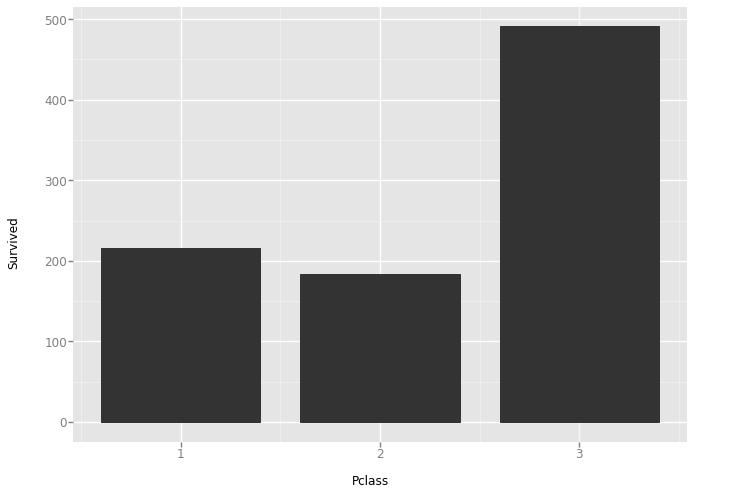

<ggplot: (8791772898829)>

In [245]:
from ggplot import *

# Survivors per class (absolute values)
ggplot(aes(x='Pclass', y='Survived'), data=df_train) + \
geom_bar()

# Proportion of survivors per class


## Feature engineering
Check if there are NaN values in certain columns, such as Embarked

In [167]:
print 'Analysis of null in training dataset'
print '-----------------------------------'
print 'Passenger_id nulls: ' + str(df_train['PassengerId'].isnull().sum())
print 'Pclass nulls: ' + str(df_train['Pclass'].isnull().sum())
print 'Age nulls: ' + str(df_train['Age'].isnull().sum())
print 'SibSp nulls: ' + str(df_train['SibSp'].isnull().sum())
print 'Parch nulls: ' + str(df_train['Parch'].isnull().sum())
print 'Ticket nulls: ' + str(df_train['Ticket'].isnull().sum())
print 'Fare nulls: ' + str(df_train['Fare'].isnull().sum())
print 'Cabin nulls: ' + str(df_train['Cabin'].isnull().sum())
print 'Embarked nulls: ' + str(df_train['Embarked'].isnull().sum())
print '-----------------------------------'
nan_rows = df_train[df_train['Age'].isnull()]
nan_rows.loc[:,:].head()

# Most frequent value per column
print 'Mean/Median/Mode in training dataset per column'
print '-----------------------------------'
print 'Embarked:'
print df_train['Embarked'].value_counts()

print "Fare: Mean = %f , Median = %f , Mode = %f" % (df_train['Fare'].mean(),df_train['Fare'].median(),df_train['Fare'].mode())
#print "Fare: Mean = %f , Median = %f , Mode = %f" % (df_train['Ticket'].mean(),df_train['Ticket'].median(),df_train['Ticket'].mode())
print 'Ticket:'
print df_train['Ticket'].value_counts().head()
print "Age: Mean = %f , Median = %f , Mode = %f" % (df_train['Age'].mean(),df_train['Age'].median(),df_train['Age'].mode())

df_train.describe()

Analysis of null in training dataset
-----------------------------------
Passenger_id nulls: 0
Pclass nulls: 0
Age nulls: 177
SibSp nulls: 0
Parch nulls: 0
Ticket nulls: 0
Fare nulls: 0
Cabin nulls: 687
Embarked nulls: 2
-----------------------------------
Mean/Median/Mode in training dataset per column
-----------------------------------
Embarked:
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Fare: Mean = 32.204208 , Median = 14.454200 , Mode = 8.050000
Ticket:
CA. 2343    7
347082      7
1601        7
347088      6
CA 2144     6
Name: Ticket, dtype: int64
Age: Mean = 29.699118 , Median = 28.000000 , Mode = 24.000000


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations:
* Min(Fare) is 0. This could mean that there are babies (for example) free of charge, or actually errors.
* Replace NaN in embarked by 'S', by far the most repeated value.
* Cabin nulls may mean people without a cabin, hence, there were less cabins than people.
* SibSp (Number of Siblings/Spouses Aboard) and Parch (Number of Parents/Children Aboard) could be merged into one feature: 'family aboard'
* It may be worth it to create buckets for Fare

## Embarked processing
* Replace NaN in embarked by 'S', by far the most repeated value.


In [216]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
print 'Embarked nulls: ' + str(df_train['Embarked'].isnull().sum())

Embarked nulls: 0


## Fare processing

In [174]:
# Checking fare errors or free tickets
df_train[['Pclass','Age','Fare']][df_train['Fare']<5]

,Pclass,Age,Fare
179,3,36.0,0.0000
263,1,40.0,0.0000
271,3,25.0,0.0000
277,2,NaN,0.0000
302,3,19.0,0.0000
378,3,20.0,4.0125
413,2,NaN,0.0000
466,2,NaN,0.0000
481,2,NaN,0.0000
597,3,49.0,0.0000


It seems that there are errors in the Fare. Change these values for the median of their class

## Age processing
* Replace NaN values for the mean/median corresponding to their class

# Prediction models

In [211]:
from sklearn.linear_model import LogisticRegression

# Replace categorical variables (Sex, Embarked, Pclass) by dummy variables
dummy_sex = pd.get_dummies(df_train['Sex'], prefix='Sex')
dummy_embarked = pd.get_dummies(df_train['Embarked'], prefix='Embarked')
dummy_pclass = pd.get_dummies(df_train['Pclass'], prefix='Pclass')

# Create a clean data frame for the regression
cols_to_keep = ['Age', 'SibSp', 'Parch', 'Fare']
X_train = df_train[cols_to_keep].join(dummy_sex).join(dummy_embarked).join(dummy_pclass)
X_train

Y_train = df_train['Survived']

# Prepare test dataset
# Replace categorical variables (Sex, Embarked, Pclass) by dummy variables
dummy_ranks_embarked = pd.get_dummies(df_test['Embarked'], prefix='Embarked')
dummy_ranks_pclass = pd.get_dummies(df_test['Pclass'], prefix='Pclass')
X_test = df_test[cols_to_keep].join(dummy_sex).join(dummy_embarked).join(dummy_pclass)
X_test

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,1,0,0,1,0,0,1
1,47.0,1,0,7.0000,1,0,1,0,0,1,0,0
2,62.0,0,0,9.6875,1,0,0,0,1,0,0,1
3,27.0,0,0,8.6625,1,0,0,0,1,1,0,0
4,22.0,1,1,12.2875,0,1,0,0,1,0,0,1
5,14.0,0,0,9.2250,0,1,0,1,0,0,0,1
6,30.0,0,0,7.6292,0,1,0,0,1,1,0,0
7,26.0,1,1,29.0000,0,1,0,0,1,0,0,1
8,18.0,0,0,7.2292,1,0,0,0,1,0,0,1
9,21.0,2,0,24.1500,1,0,1,0,0,0,1,0


## Logistic regression

In [212]:
LR_model = LogisticRegression()

LR_model.fit(X_train, Y_train)

#Y_pred = logreg.predict(X_test)

#logreg.score(X_train, Y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Simple model (Pclass, Gender, and Fare)
* As Fare is not discrete, create buckets for these feature

In [14]:
# Open CSV file for test data
test_data = open('data/test.csv', 'rb')
test_data_csv = csv.reader(test_data)
header = test_data_csv.next()

# Prepare file for predition based on gender ONLY
prediction_file = open("gender_based_model.csv", "wb")
prediction_file_csv = csv.writer(prediction_file)
prediction_file_csv.writerow(["PassengerId", "Survived"]) # write the column headers